In [1]:
## Initial Setup

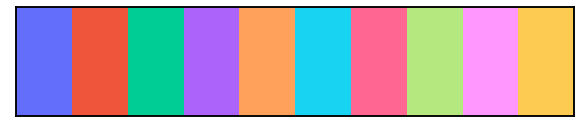

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns

sns.set_context("talk")


import os

global DATA_ORIGINAL_PATH, DATA_GENERATED_PATH, IMAGES_GENERATED_PATH, IMAGES_PRESENTATION_PATH

DATA_ORIGINAL_PATH = "00_data_original/"
DATA_GENERATED_PATH = "01_data_generated/"
IMAGES_GENERATED_PATH = "02_images_generated/"
IMAGES_PRESENTATION_PATH = "03_images_for_presentation/"

global DATA_ORIGINAL_FILES, DATA_GENERATED_FILES, IMAGES_GENERATED_FILES, IMAGES_PRESENTATION_FILES

DATA_ORIGINAL_FILES = [os.path.join(DATA_ORIGINAL_PATH, f) for f in os.listdir(DATA_ORIGINAL_PATH) if os.path.isfile(os.path.join(DATA_ORIGINAL_PATH, f))]
DATA_GENERATED_FILES = [os.path.join(DATA_GENERATED_PATH, f) for f in os.listdir(DATA_GENERATED_PATH) if os.path.isfile(os.path.join(DATA_GENERATED_PATH, f))]
IMAGES_GENERATED_FILES = [os.path.join(IMAGES_GENERATED_PATH, f) for f in os.listdir(IMAGES_GENERATED_PATH) if os.path.isfile(os.path.join(IMAGES_GENERATED_PATH, f))]
IMAGES_PRESENTATION_FILES = [os.path.join(IMAGES_PRESENTATION_PATH, f) for f in os.listdir(IMAGES_PRESENTATION_PATH) if os.path.isfile(os.path.join(IMAGES_PRESENTATION_PATH, f))]


global COLORS
import plotly.express as px

# Get the original Wd3 discrete color map

COLORS = px.colors.qualitative.Plotly
# COLORS

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 2))

for i, color in enumerate(COLORS):
    _ = plt.fill_between([i, i + 1], 0, 1, facecolor=color)

_ = plt.xlim(0, len(COLORS))
_ = plt.ylim(0, 1)

_ = plt.xticks([])
_ = plt.yticks([])
fig.savefig(IMAGES_GENERATED_PATH + 'Plotly_Plotly_COLORS.png', dpi=300, bbox_inches='tight')
_ = plt.show()


### Read data:

In [3]:
import os
import pandas as pd

class DataSummaryReport:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.data_frames = {}
        
    def read_data(self):
        for file_name in os.listdir(self.folder_path):
            if file_name.endswith('.parquet'):
                file_path = os.path.join(self.folder_path, file_name)
                base_name = os.path.splitext(file_name)[0]
                self.data_frames[base_name] = pd.read_parquet(file_path)


    def generate_report(self):
        report_path = os.path.join(DATA_GENERATED_PATH, "original_data_summary_report.txt")
        
        with open(report_path, 'w') as f:
            order_id = 0
            for file_name, df in self.data_frames.items():
                order_id += 1
                f.write("=" * 80 + "\n\n")
                f.write(f"Data Summary Report {order_id:02}: {file_name}_df\n") #{order_id:02} means that the order_id will be printed with 2 digits, and if it is less than 2 digits, it will be padded with 0
                f.write("=" * 80 + "\n\n")
                f.write(f"{order_id:02}.01 - File shape: {df.shape}\n\n")
                f.write("-"*30 + "\n\n")
                f.write(f"{order_id:02}.02 - DataFrame columns:\n{df.columns}\n\n")
                f.write("-"*30 + "\n\n")
                f.write(f"{order_id:02}.03 - DataFrame data types:\n{df.dtypes}\n\n")
                f.write("-"*30 + "\n\n")
                f.write(f"{order_id:02}.04 - DataFrame info:\n")
                df.info(buf=f)
                f.write("\n\n")
                f.write("-"*30 + "\n\n")
                f.write(f"{order_id:02}.05 - DataFrame description:\n{df.describe()}\n\n")
                f.write("-"*30 + "\n\n")
                f.write(f"{order_id:02}.06 - DataFrame unique value counts:\n{df.nunique()}\n\n")
                f.write("-"*30 + "\n\n")
                f.write(f"{order_id:02}.07 - DataFrame missing value counts:\n{df.isna().sum()}\n\n")
                f.write("-"*30 + "\n\n")
                f.write(f"{order_id:02}.08 - DataFrame has missing values: {df.isna().any().any()}\n")
                f.write("-"*30 + "\n\n")
                f.write(f"{order_id:02}.09 - DataFrame missing value percentage: {df.isna().sum().sum() / len(df) * 100:.2f}%\n\n")
                f.write("-"*30 + "\n\n")
                f.write(f"{order_id:02}.10 - DataFrame head:\n{df.head()}\n\n")
                f.write("-"*30 + "\n\n")
                f.write(f"{order_id:02}.11 - DataFrame tail:\n{df.tail()}\n\n")
                f.write("-"*30 + "\n\n")
                # f.write("=" * 80 + "\n\n")
            
        return report_path
    
# read data:
# Create a DataSummaryReport object
report_generator = DataSummaryReport(DATA_ORIGINAL_PATH)

report_generator.read_data()

# Get the dataframes
dataframes = report_generator.data_frames

# Access the 'flights' dataframe
flights_df = dataframes['flights']

# Access the 'flights_test' dataframe
flights_test_df = dataframes['flights_test']

# Access the 'fuel_comsumption' dataframe
fuel_comsumption_df = dataframes['fuel_comsumption']

# Access the 'passengers' dataframe
passengers_df = dataframes['passengers']



In [4]:
# check all the *_df shape:
print(flights_df.shape)
print(flights_test_df.shape)
print(fuel_comsumption_df.shape)
print(passengers_df.shape)



(15927485, 42)
(660556, 20)
(3035, 25)
(2350497, 38)


In [5]:

# read airport_info from parquet at path GENERATED_DATA_PATH
# with pd.read_parquet()
airport_info = pd.read_parquet(DATA_GENERATED_PATH + 'airport_info.parquet')

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [6]:
# show all the columns from these four tables that has has delay in the column names:
delay_related_columns = []
for df_name, df in dataframes.items():
    print('\nsearching in: ', df_name, '...\n')
    for col in df.columns:
        if 'delay' in col:
            print(f"{df_name}_df['{col}']")
            delay_related_columns.append(f"{df_name}_df['{col}']")
# delay_related_columns
# delay_related_columns            
            


searching in:  flights ...

flights_df['dep_delay']
flights_df['arr_delay']
flights_df['carrier_delay']
flights_df['weather_delay']
flights_df['nas_delay']
flights_df['security_delay']
flights_df['late_aircraft_delay']

searching in:  flights_test ...


searching in:  fuel_comsumption ...


searching in:  passengers ...



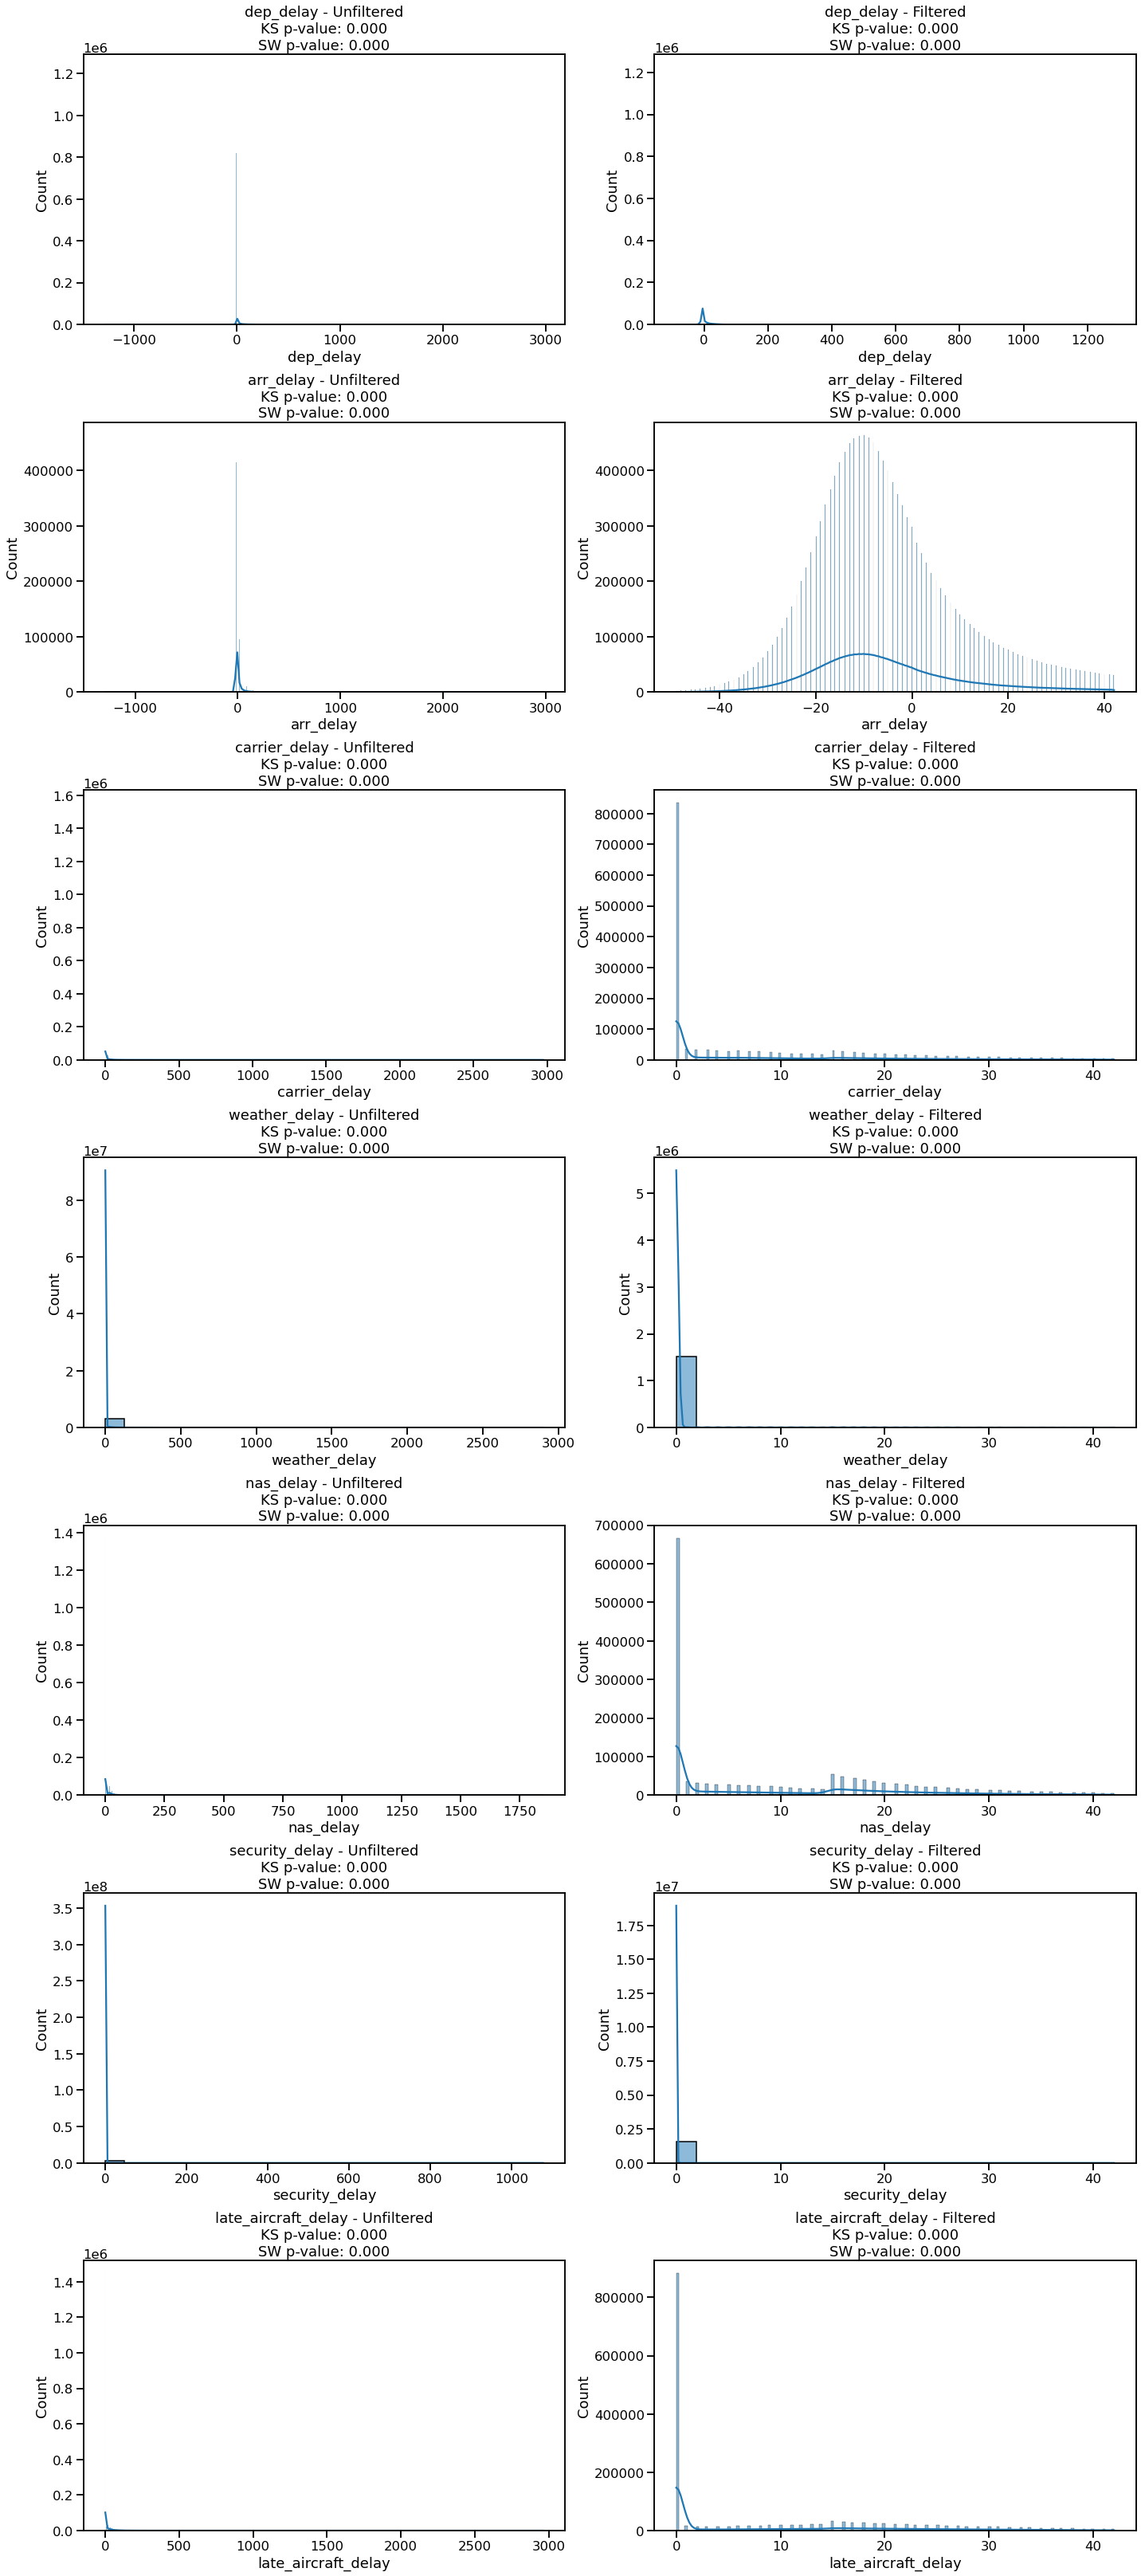

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming you have loaded the data into a dataframe called flights_df

# Remove missing values
df = flights_df.dropna(subset=['arr_delay'])

# Remove outliers using the IQR method (adjust the factor as needed)
Q1 = df['arr_delay'].quantile(0.25)
Q3 = df['arr_delay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['arr_delay'] >= lower_bound) & (df['arr_delay'] <= upper_bound)]

# Define delay-related columns
delay_columns = [
    'dep_delay', 'arr_delay', 'carrier_delay',
    'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'
]

fig, axes = plt.subplots(len(delay_columns), 2, figsize=(20, 45))

# Plot distributions without filtering
for i, column in enumerate(delay_columns):
    data = df[column].dropna()
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    sw_stat, sw_p_value = stats.shapiro(data.sample(min(len(data), 5000)))  # Shapiro-Wilk test is limited to 5000 samples
    _ = sns.histplot(data, kde=True, ax=axes[i, 0])
    _ = axes[i, 0].set_title(f'{column} - Unfiltered\nKS p-value: {ks_p_value:.3f}\nSW p-value: {sw_p_value:.3f}')

# Plot distributions with filtering
for i, column in enumerate(delay_columns):
    data = filtered_df[column].dropna()
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    sw_stat, sw_p_value = stats.shapiro(data.sample(min(len(data), 5000)))  # Shapiro-Wilk test is limited to 5000 samples
    _ = sns.histplot(data, kde=True, ax=axes[i, 1])
    _ = axes[i, 1].set_title(f'{column} - Filtered\nKS p-value: {ks_p_value:.3f}\nSW p-value: {sw_p_value:.3f}')

plt.tight_layout()
plt.savefig(IMAGES_GENERATED_PATH + 'EDA_01_delay_distributions.png', dpi=300, bbox_inches='tight', pad_inches=0.2, facecolor='w', edgecolor='w', transparent=False)
plt.show()


The code provided tests the hypothesis that the delay is from a normal distribution and that the mean of the delay is 0 by using two statistical tests: the Kolmogorov-Smirnov (KS) test and the Shapiro-Wilk (SW) test. These tests are applied to each delay-related column in both the unfiltered and filtered dataframes.

The Kolmogorov-Smirnov test compares the empirical cumulative distribution function (ECDF) of the sample data to the cumulative distribution function (CDF) of a reference distribution, in this case, the normal distribution. The KS test returns a p-value that indicates the likelihood of the sample data coming from the reference distribution. A high p-value (e.g., greater than 0.05) would suggest that the sample data may come from a normal distribution.

The Shapiro-Wilk test specifically tests the null hypothesis that the sample data comes from a normal distribution. This test also returns a p-value, and a high p-value indicates that the data is likely to come from a normal distribution.

In the provided code, the histograms of the delay-related columns are plotted, and the KS and SW test results (p-values) are displayed in the title of each subplot. If the p-values are high (greater than a chosen significance level, e.g., 0.05), this would suggest that the delay data might come from a normal distribution with a mean of 0. However, if the p-values are low, the null hypothesis would be rejected, indicating that the data does not come from a normal distribution with a mean of 0.

It's important to note that these tests are sensitive to outliers, which is why the code also provides the option to filter the data using the IQR method to remove outliers before performing the tests. This allows for a comparison between the unfiltered and filtered data to observe how the presence of outliers may affect the test results.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [8]:
flights_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [9]:
# # Use seaborn to plot the monthly average arrival delay, with the yearly average as a horizontal line
# # year and month need to be retrieved from the "fl_date" column,
# #


# flights_df['fl_date'].head() 
# returns:
# 2018-05-18
# 2018-05-18
# 2018-05-18
# 2018-05-18
# 2018-05-18

# # save the plot as png, use dpi=300, bbox_inches='tight', pad_inches=0.2, facecolor='w', edgecolor='w'
# # path = IMAGES_GENERATED_PATH + 'monthly_average_arrival_delay.png'

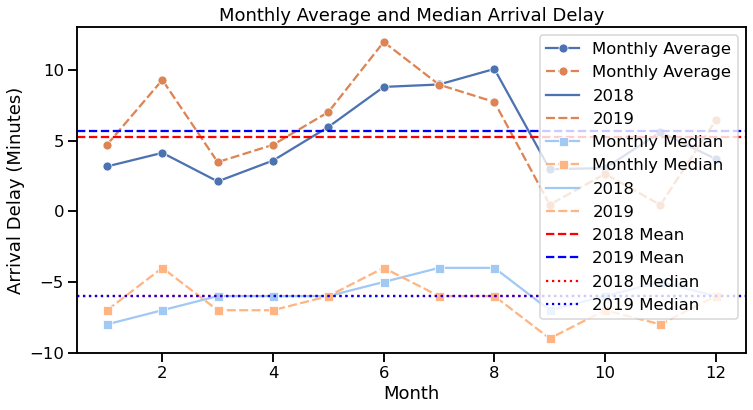

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded the data into a dataframe called flights_df

# Extract year and month from 'fl_date' column
flights_df['year'] = pd.to_datetime(flights_df['fl_date']).dt.year
flights_df['month'] = pd.to_datetime(flights_df['fl_date']).dt.month

# Calculate monthly average and median arrival delay
monthly_avg_delay = flights_df.groupby(['year', 'month'])['arr_delay'].mean().reset_index()
monthly_median_delay = flights_df.groupby(['year', 'month'])['arr_delay'].median().reset_index()

# Calculate yearly mean and median for 2018 and 2019
yearly_mean = flights_df.groupby('year')['arr_delay'].mean()
yearly_median = flights_df.groupby('year')['arr_delay'].median()

_ = plt.figure(figsize=(12, 6))

# Plot the monthly average and median arrival delay
_ = sns.lineplot(data=monthly_avg_delay, x='month', y='arr_delay', hue='year', marker='o', style='year', palette='deep', label='Monthly Average')
_ = sns.lineplot(data=monthly_median_delay, x='month', y='arr_delay', hue='year', marker='s', style='year', palette='pastel', label='Monthly Median')

# Plot yearly mean and median lines
for year in yearly_mean.index:
    _ = plt.axhline(yearly_mean[year], color='red' if year == 2018 else 'blue', linestyle='--', label=f'2018 Mean' if year == 2018 else f'2019 Mean')

for year in yearly_median.index:
    _ = plt.axhline(yearly_median[year], color='red' if year == 2018 else 'blue', linestyle=':', label=f'2018 Median' if year == 2018 else f'2019 Median')

# Customize the plot
_ = plt.title('Monthly Average and Median Arrival Delay')
_ = plt.xlabel('Month')
_ = plt.ylabel('Arrival Delay (Minutes)')
_ = plt.legend()

# Save the plot as a PNG file
path = IMAGES_GENERATED_PATH + 'EDA_02_monthly_average_arrival_delay.png'
_ = plt.savefig(path, dpi=300, bbox_inches='tight', pad_inches=0.1, facecolor='w', edgecolor='w', transparent=False)

_ = plt.show()


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [43]:
# read the openweathermap_api_key.csv for the only value in the file
OPEN_WEATHER_MAP_API_KEY = pd.read_csv('~/openweathermap_api_key.csv', header=None).values[0][0]



In [50]:
sample_flights = flights_df.sample(n=1000, random_state=42)  # Adjust the sample size as needed

# save the sample_flights dataframe as a parquet file
sample_flights.to_parquet(DATA_GENERATED_PATH + 'sample_flights.parquet')



(1000, 44)

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'year', 'month'],
      dtype='object')

In [51]:

import pandas as pd
import requests

# Merge airport_info and sample_flights
sample_flights = pd.merge(sample_flights, airport_info, left_on='origin', right_on='airport_code')

# save the sample_flights dataframe as a parquet file
sample_flights.to_parquet(DATA_GENERATED_PATH + 'sample_flights_with_airport_info.parquet')


(1000, 48)

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'year', 'month', 'airport_code',
       'airport_name', 'airport_lat', 'airport_long'],
      dtype='object')

In [56]:
# read the sample_flights_with_airport_info.parquet file
# sample_flights = pd.read_parquet(DATA_GENERATED_PATH + 'sample_flights_with_airport_info.parquet')

Test the API

In [26]:
# # The code to test the API key

# import requests

# city = 'London'
# url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={OPEN_WEATHER_MAP_API_KEY}'

# response = requests.get(url)

# if response.status_code == 200:
#     print('API key is working!')
#     print(response.json())
# else:
#     print('There was an issue with the API key or request.')
#     print(response.status_code, response.text)


API key is working!
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.24, 'feels_like': 282.68, 'temp_min': 281.96, 'temp_max': 284.14, 'pressure': 1015, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 230}, 'clouds': {'all': 100}, 'dt': 1679302170, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1679292250, 'sunset': 1679335921}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


##### OpenWeatherMap API

In [61]:
# define a switch to this api call
# if the switch is on, then the api call will be made
# if the switch is off, then the api call will not be made

open_weather_api_switch = False

if open_weather_api_switch:

    import pandas as pd
    import requests
    import time
    from IPython.display import display, clear_output

    # Function to fetch weather data
    def get_weather_data(api_key, lat, lon, date):
        url = f'https://api.openweathermap.org/data/3.0/onecall/timemachine?lat={lat}&lon={lon}&dt={date}&appid={api_key}'
        response = requests.get(url)

        if response.status_code == 200:
            clear_output(wait=True)
            display('response.status_code: ', response.status_code)
            data = response.json()

            weather_data = {
                'sunrise': data['data'][0].get('sunrise', None),
                'sunset': data['data'][0].get('sunset', None),
                'temp': data['data'][0].get('temp', None),
                'feels_like': data['data'][0].get('feels_like', None),
                'pressure': data['data'][0].get('pressure', None),
                'humidity': data['data'][0].get('humidity', None),
                'dew_point': data['data'][0].get('dew_point', None),
                'uvi': data['data'][0].get('uvi', None),
                'clouds': data['data'][0].get('clouds', None),
                'visibility': data['data'][0].get('visibility', None),
                'wind_speed': data['data'][0].get('wind_speed', None),
                'wind_deg': data['data'][0].get('wind_deg', None),
                'weather_id': data['data'][0]['weather'][0].get('id', None),
                'weather_main': data['data'][0]['weather'][0].get('main', None),
                'weather_description': data['data'][0]['weather'][0].get('description', None),
                'weather_icon': data['data'][0]['weather'][0].get('icon', None)
            }

            return weather_data
        else:
            clear_output(wait=True)
            display('response.status_code: ', response.status_code)
            return None

    api_key = OPEN_WEATHER_MAP_API_KEY

    # Convert date to UNIX timestamp (required by OpenWeatherMap API)
    sample_flights['timestamp'] = sample_flights['fl_date'].apply(lambda x: int(pd.to_datetime(x).timestamp()))

    # Fetch weather data for each flight in the sample, limiting requests to 1 per second
    weather_columns = ['sunrise', 'sunset', 'temp', 'feels_like', 'pressure', 'humidity', 'dew_point', 'uvi', 'clouds', 'visibility', 'wind_speed', 'wind_deg', 'weather_id', 'weather_main', 'weather_description', 'weather_icon']

    for column in weather_columns:
        sample_flights[column] = None

    def fetch_weather(row):
        time.sleep(1)
        weather_data = get_weather_data(api_key, row['airport_lat'], row['airport_long'], row['timestamp'])

        if weather_data:
            for column in weather_columns:
                row[column] = weather_data[column]
        return row

    sample_flights = sample_flights.apply(fetch_weather, axis=1)
    sample_flights.to_parquet(DATA_GENERATED_PATH + 'sample_flights_with_airport_info_weather.parquet')
else:
    sample_flights = pd.read_parquet(DATA_GENERATED_PATH + 'sample_flights_with_airport_info_weather.parquet')

'response.status_code: '

200

In [68]:
# The unique values of the weather_main column are:
sample_flights['weather_main'].unique()

array(['Thunderstorm', 'Clouds', 'Clear', 'Rain', 'Fog', 'Mist', 'Snow',
       'Haze', 'Drizzle', 'Smoke'], dtype=object)

In [71]:
sample_flights.shape
sample_flights.columns
sample_flights.head()

(1000, 65)

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'year', 'month', 'airport_code',
       'airport_name', 'airport_lat', 'airport_long', 'timestamp', 'sunrise',
       'sunset', 'temp', 'feels_like', 'pressure', 'humidity', 'dew_point',
       'uvi', 'clouds', 'visibility', 'wind_speed', 'wind_deg', 'weather_i

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,weather_id,weather_main,weather_description,weather_icon
0,2018-09-03,WN,WN,WN,55,WN,N489WN,55,14107,PHX,...,284.53,None,75,10000,4.63,190,211,Thunderstorm,thunderstorm,11d
1,2018-07-04,F9,F9,F9,1412,F9,N910FR,1412,14107,PHX,...,275.66,None,20,10000,3.10,230,801,Clouds,few clouds,02d
2,2018-06-18,WN,WN,WN,1567,WN,N8685B,1567,14107,PHX,...,275.06,None,20,10000,8.23,190,801,Clouds,few clouds,02d
3,2019-02-08,DL,DL,DL,1494,DL,N339DN,1494,14107,PHX,...,265.25,None,0,10000,2.60,10,800,Clear,clear sky,01d
4,2019-11-08,AA,AA,AA,2795,AA,N763US,2795,14107,PHX,...,276.95,None,40,10000,2.60,250,802,Clouds,scattered clouds,03d


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

Text(0.5, 0, 'Arrival Delay (minutes)')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Delay Distributions by Weather Type')

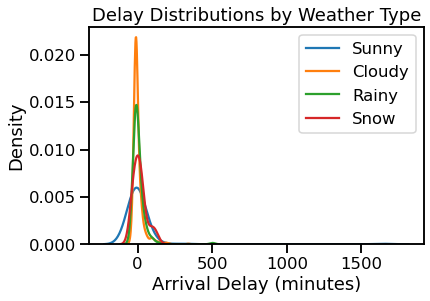

ANOVA test p-value: 0.2964835947206174
Fail to reject the null hypothesis. Delays are from the same distribution.


In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Filter dataset based on weather types
sunny_flights = sample_flights[sample_flights['weather_main'] == 'Clear']
cloudy_flights = sample_flights[sample_flights['weather_main'] == 'Clouds']
rainy_flights = sample_flights[sample_flights['weather_main'] == 'Rain']
snow_flights = sample_flights[sample_flights['weather_main'] == 'Snow']

# Extract delay data for each weather type
sunny_delays = sunny_flights['arr_delay'].dropna()
cloudy_delays = cloudy_flights['arr_delay'].dropna()
rainy_delays = rainy_flights['arr_delay'].dropna()
snow_delays = snow_flights['arr_delay'].dropna()

# Plot distributions of delays for each weather type
sns.kdeplot(sunny_delays, label='Sunny')
sns.kdeplot(cloudy_delays, label='Cloudy')
sns.kdeplot(rainy_delays, label='Rainy')
sns.kdeplot(snow_delays, label='Snow')
plt.legend()
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Density')
plt.title('Delay Distributions by Weather Type')
plt.show()

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(sunny_delays, cloudy_delays, rainy_delays, snow_delays)
print(f'ANOVA test p-value: {p_value}')

# Set the significance level
alpha = 0.05

if p_value < alpha:
    print('Reject the null hypothesis. Delays are not from the same distribution.')
else:
    print('Fail to reject the null hypothesis. Delays are from the same distribution.')


The Kruskal-Wallis test and Dunn's test are non-parametric alternatives to the one-way ANOVA and post hoc pairwise t-tests. These non-parametric tests are appropriate when the data do not meet the assumptions of the parametric tests, such as the assumption of normality or equal variances across groups.

If the data do not meet the assumptions of the one-way ANOVA, we should use the Kruskal-Wallis test instead. If the Kruskal-Wallis test shows a significant difference among the groups, we can then perform Dunn's test for pairwise comparisons with a correction for multiple comparisons (e.g., Bonferroni correction).



In [75]:
from scipy.stats import kruskal
import scikit_posthocs as sp

# Perform the Kruskal-Wallis test
h_stat, p_value_kruskal = kruskal(sunny_delays, cloudy_delays, rainy_delays, snow_delays)
print(f'Kruskal-Wallis test p-value: {p_value_kruskal}')

if p_value_kruskal < alpha:
    print('Reject the null hypothesis. Delays are not from the same distribution.')

    # Perform Dunn's test for pairwise comparisons
    all_delays = np.concatenate([sunny_delays, cloudy_delays, rainy_delays, snow_delays])
    weather_groups = np.concatenate([
        np.full(sunny_delays.shape, 'Sunny'),
        np.full(cloudy_delays.shape, 'Cloudy'),
        np.full(rainy_delays.shape, 'Rainy'),
        np.full(snow_delays.shape, 'Snow'),
    ])

    dunn_result = sp.posthoc_dunn(weather_groups, all_delays, p_adjust='bonferroni')
    print("\nDunn's test pairwise comparison results (Bonferroni-adjusted p-values):\n")
    print(dunn_result)
else:
    print('Fail to reject the null hypothesis. Delays are from the same distribution.')


Kruskal-Wallis test p-value: 0.31409318399723435
Fail to reject the null hypothesis. Delays are from the same distribution.


Consider all the weather types instead of 4.

In [76]:
import numpy as np
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp

alpha = 0.05

# Define the weather types
weather_types = ['Thunderstorm', 'Clouds', 'Clear', 'Rain', 'Fog', 'Mist', 'Snow', 'Haze', 'Drizzle', 'Smoke']

# Extract delay data for each weather type
delays_by_weather = [sample_flights[sample_flights['weather_main'] == weather]['arr_delay'].dropna().values for weather in weather_types]

# Perform the Kruskal-Wallis test
h_stat, p_value_kruskal = kruskal(*delays_by_weather)
print(f'Kruskal-Wallis test p-value: {p_value_kruskal}')

if p_value_kruskal < alpha:
    print('Reject the null hypothesis. Delays are not from the same distribution.')

    # Perform Dunn's test for pairwise comparisons
    all_delays = np.concatenate(delays_by_weather)
    weather_groups = np.concatenate([np.full(delays.shape, weather) for weather, delays in zip(weather_types, delays_by_weather)])

    dunn_result = sp.posthoc_dunn(weather_groups, all_delays, p_adjust='bonferroni')
    print("\nDunn's test pairwise comparison results (Bonferroni-adjusted p-values):\n")
    print(dunn_result)
else:
    print('Fail to reject the null hypothesis. Delays are from the same distribution.')


Kruskal-Wallis test p-value: 0.11219170991991469
Fail to reject the null hypothesis. Delays are from the same distribution.


#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

<AxesSubplot:xlabel='dep_hour', ylabel='num_flights'>

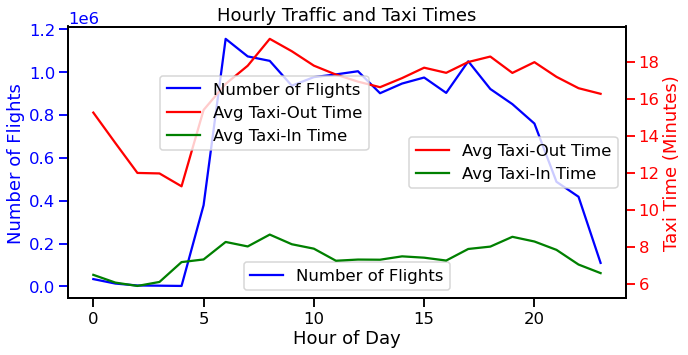

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the data into a dataframe called flights_df

# Function to extract the hour of the day from the time string
def extract_hour(time_str):
    time_str = str(time_str).zfill(4)
    return int(time_str[:2])

# Extract the hour of the day from the scheduled departure and arrival times
flights_df['dep_hour'] = flights_df['crs_dep_time'].apply(extract_hour)
flights_df['arr_hour'] = flights_df['crs_arr_time'].apply(extract_hour)

# Calculate the number of flights per hour (traffic)
hourly_traffic = flights_df.groupby('dep_hour').size().reset_index(name='num_flights')

# Calculate the average taxi-out and taxi-in times for each hour
hourly_taxi_out = flights_df.groupby('dep_hour')['taxi_out'].mean().reset_index()
hourly_taxi_in = flights_df.groupby('arr_hour')['taxi_in'].mean().reset_index()

# Merge the dataframes for easier plotting
merged_data = pd.merge(hourly_traffic, hourly_taxi_out, on='dep_hour')
merged_data = pd.merge(merged_data, hourly_taxi_in, left_on='dep_hour', right_on='arr_hour')
merged_data = merged_data.drop(columns=['arr_hour'])

# Plot the traffic and average taxi times against the hour of the day
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=merged_data, x='dep_hour', y='num_flights', ax=ax1, color='b', label='Number of Flights')
_ = ax1.set_xlabel('Hour of Day')
_ = ax1.set_ylabel('Number of Flights', color='b')
_ = ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
_ = sns.lineplot(data=merged_data, x='dep_hour', y='taxi_out', ax=ax2, color='r', label='Avg Taxi-Out Time')
_ = sns.lineplot(data=merged_data, x='dep_hour', y='taxi_in', ax=ax2, color='g', label='Avg Taxi-In Time')
_ = ax2.set_ylabel('Taxi Time (Minutes)', color='r')
_ = ax2.tick_params('y', colors='r')

_ = plt.title('Hourly Traffic and Taxi Times')
_ = fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85), bbox_transform=ax1.transAxes)
# save png to IMAGE_GENERATION_PATH
_ = plt.savefig(os.path.join(IMAGES_GENERATED_PATH, 'hourly_traffic_taxi_times.png'), bbox_inches='tight', dpi=300, facecolor='w',edgecolor='w', transparent=False)
_ = plt.show()


In [84]:
merged_data

,dep_hour,num_flights,taxi_out,taxi_in
0,0,34142,15.247244,6.480646
1,1,13322,13.601638,6.061842
2,2,4356,11.986757,5.881094
3,3,3420,11.959857,6.097484
4,4,2220,11.264357,7.169193
5,5,378527,15.388673,7.312468
6,6,1153650,16.796728,8.257843
7,7,1071851,17.778963,8.015422
8,8,1051054,19.231258,8.656256
9,9,935292,18.562103,8.134389


The data shows the number of flights, average taxi-out times, and average taxi-in times for each hour of the day. From this information, we can make the following observations:

1. Taxi-out times increase during peak hours (6 AM to 9 AM and 5 PM to 8 PM). This suggests that higher traffic could lead to longer taxi-out times, as more planes are waiting to depart.
2. Taxi-in times are also generally higher during peak hours (6 AM to 9 AM and 5 PM to 8 PM). This indicates that more incoming flights could result in longer taxi-in times, as planes may need to wait for available gates or clearance to approach the airport.
3. During off-peak hours (late night and early morning), both taxi-out and taxi-in times are shorter, likely because of reduced airport traffic.

In conclusion, taxi times do change during the day, with higher traffic generally leading to longer taxi-out and taxi-in times. The data suggests that peak hours have a significant impact on taxi times, and off-peak hours are associated with shorter taxi times.

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

calculate the average departure delay and average arrival delay:

In [86]:
avg_dep_delay = flights_df['dep_delay'].mean()
avg_arr_delay = flights_df['arr_delay'].mean()


calculate the percentage of delays created before departure:

In [87]:
percentage_delays_before_departure = (avg_dep_delay / avg_arr_delay) * 100


if airlines are able to lower the delay during the flights. 

In [88]:
if avg_arr_delay < avg_dep_delay:
    print("Airlines are able to lower the delay during the flights.")
else:
    print("Airlines are not able to lower the delay during the flights.")


Airlines are able to lower the delay during the flights.


#### **Task 6**: How many states cover 50% of US air traffic? 

In [97]:
flights_df.columns
# show the loast two characters in flights_df['origin_city_name']
flights_df['origin_city_name'].str[-2:].nunique()

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'year', 'month', 'dep_hour',
       'arr_hour'],
      dtype='object')

53

In [98]:
# Calculate the number of flights per state
flights_per_state = flights_df.groupby(flights_df['origin_city_name'].str[-2:]).size().reset_index(name='num_flights')

# Sort the states by the number of flights in descending order
flights_per_state = flights_per_state.sort_values(by='num_flights', ascending=False)

# Calculate the cumulative percentage of flights
flights_per_state['cumulative_percentage'] = (flights_per_state['num_flights'].cumsum() / flights_per_state['num_flights'].sum()) * 100

# Find the number of states covering 50% of the US air traffic
num_states = len(flights_per_state[flights_per_state['cumulative_percentage'] <= 50])

print(f"{num_states} states cover 50% of US air traffic.")


7 states cover 50% of US air traffic.


In [101]:
flights_per_state = flights_per_state.sort_values(by='num_flights', ascending=False)
flights_per_state

,origin_city_name,num_flights,cumulative_percentage
4,CA,1738254,10.913550
44,TX,1572078,20.783771
8,FL,1151221,28.011660
13,IL,1008184,34.341498
9,GA,841057,39.622037
33,NY,827854,44.819681
26,NC,736077,49.441108
5,CO,622430,53.349006
37,PA,475258,56.332892
7,DC,472958,59.302338


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

* Calculate the flight speed for each flight in the dataset.
* Divide the dataset into two groups: flights with departure delays and flights without departure delays.
* Compare the average flight speeds between the two groups using a statistical hypothesis test, such as the independent two-sample t-test.

In [102]:
import numpy as np
from scipy.stats import ttest_ind

# Calculate flight speed (miles per hour) for each flight
flights_df['flight_speed'] = flights_df['distance'] / (flights_df['air_time'] / 60)

# Divide the dataset into two groups: with departure delays and without departure delays
flights_with_departure_delay = flights_df[flights_df['dep_delay'] > 0]
flights_without_departure_delay = flights_df[flights_df['dep_delay'] <= 0]

# Calculate average flight speeds for each group
avg_speed_with_delay = np.mean(flights_with_departure_delay['flight_speed'])
avg_speed_without_delay = np.mean(flights_without_departure_delay['flight_speed'])

print(f'Average flight speed with departure delay: {avg_speed_with_delay:.2f} mph')
print(f'Average flight speed without departure delay: {avg_speed_without_delay:.2f} mph')

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(flights_with_departure_delay['flight_speed'].dropna(), 
                            flights_without_departure_delay['flight_speed'].dropna())

print(f'T-statistic: {t_stat}, p-value: {p_value}')


Average flight speed with departure delay: 405.33 mph
Average flight speed without departure delay: 395.63 mph
T-statistic: 244.63750833213638, p-value: 0.0


The p-value is less than the significance level (e.g., 0.05), and the null hypothesis is rejected. It can be concluded that there is a significant difference in flight speeds between flights with departure delays and those without. 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

* Categorize flights into 'LONG', 'SHORT', and 'MEDIUM' haul based on the distance.
* Extract the departure hour from the 'crs_dep_time' column.
* Count the number of flights for each haul category and departure hour.
* Find the departure hour with the highest number of flights for each haul category.

In [103]:
def categorize_flight(distance):
    if distance <= 800:
        return 'SHORT'
    elif distance <= 2200:
        return 'MEDIUM'
    else:
        return 'LONG'

# Categorize flights into 'LONG', 'SHORT', and 'MEDIUM' haul based on the distance
flights_df['haul_category'] = flights_df['distance'].apply(categorize_flight)

# Extract the departure hour from 'crs_dep_time'
flights_df['dep_hour'] = flights_df['crs_dep_time'].apply(lambda x: int(str(x).zfill(4)[:2]))

# Count the number of flights for each haul category and departure hour
flights_by_haul_and_hour = flights_df.groupby(['haul_category', 'dep_hour']).size().reset_index(name='num_flights')

# Find the departure hour with the highest number of flights for each haul category
max_flights_by_haul = flights_by_haul_and_hour.loc[flights_by_haul_and_hour.groupby('haul_category')['num_flights'].idxmax()]

print(max_flights_by_haul)


   haul_category  dep_hour  num_flights
6           LONG         8        64844
29        MEDIUM         7       404015
51         SHORT         6       719976


#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

##### Approach 1: Total flights count


In [105]:
# Count the number of flights for each origin and destination airport
origin_flights = flights_df.groupby('origin').size().reset_index(name='num_origin_flights')
dest_flights = flights_df.groupby('dest').size().reset_index(name='num_dest_flights')

# Combine the counts for origin and destination
total_flights = origin_flights.merge(dest_flights, left_on='origin', right_on='dest')

total_flights['total_flights'] = total_flights['num_origin_flights'] + total_flights['num_dest_flights']
total_flights = total_flights.drop(columns=['num_origin_flights', 'num_dest_flights'])

# Sort the airports by the total number of flights and select the top 10
top_10_airports = total_flights.sort_values(by='total_flights', ascending=False).head(10)

print(top_10_airports)


    origin dest  total_flights
257    ORD  ORD        1580382
22     ATL  ATL        1571735
95     DFW  DFW        1169290
94     DEN  DEN        1104315
74     CLT  CLT        1003049
196    LAX  LAX        1001765
321    SEA  SEA         758707
323    SFO  SFO         715396
272    PHX  PHX         710947
169    IAH  IAH         708716


In [106]:
total_traffic = total_flights['total_flights'].sum()
top_10_traffic = top_10_airports['total_flights'].sum()
percentage_covered = (top_10_traffic / total_traffic) * 100

print(f'These 10 airports cover {percentage_covered:.2f}% of the total traffic.')


These 10 airports cover 32.41% of the total traffic.


##### Approach 2: Total passengers count

* Sum the number of passengers for each origin and destination airport.
* Combine the counts for origin and destination to get the total number of passengers for each airport.
* Sort the airports by the total number of passengers and select the top 10.

In [107]:
# Sum the number of passengers for each origin and destination airport
origin_passengers = passengers_df.groupby('origin')['passengers'].sum().reset_index(name='num_origin_passengers')
dest_passengers = passengers_df.groupby('dest')['passengers'].sum().reset_index(name='num_dest_passengers')

# Combine the counts for origin and destination
total_passengers = origin_passengers.merge(dest_passengers, left_on='origin', right_on='dest')

total_passengers['total_passengers'] = total_passengers['num_origin_passengers'] + total_passengers['num_dest_passengers']
total_passengers = total_passengers.drop(columns=['num_origin_passengers', 'num_dest_passengers'])

# Sort the airports by the total number of passengers and select the top 10
top_10_airports_by_passengers = total_passengers.sort_values(by='total_passengers', ascending=False).head(10)

print(top_10_airports_by_passengers)


     origin dest  total_passengers
168     ATL  ATL       515264547.0
1134    LAX  LAX       410933768.0
1550    ORD  ORD       388608176.0
528     DFW  DFW       328114204.0
526     DEN  DEN       302145218.0
1003    JFK  JFK       299081264.0
1846    SFO  SFO       267290706.0
1132    LAS  LAS       235131635.0
1834    SEA  SEA       228232804.0
419     CLT  CLT       226002708.0


In [118]:
# check the origin column of the top_10_airports_by_passengers and top_10_airports DataFrames, to see which ones are the same, and list them:
print("Number of airports that are in the top 10 by traffic and in the top 10 by passengers:")
top_10_airports_by_passengers['origin'].isin(top_10_airports['origin']).value_counts()

# use set to find the common airports
common_airports = set(top_10_airports_by_passengers['origin']).intersection(set(top_10_airports['origin']))
print("Common airports:")
common_airports


# print the common airports in the descending order of the total number of passengers
print("Common airports in the descending order of the total number of passengers:")
top_10_airports_by_passengers[top_10_airports_by_passengers['origin'].isin(common_airports)].sort_values(by='total_passengers', ascending=False)

# print the two airports that are in the top 10 by traffic but not in the top 10 by passengers
print("Airports that are in the top 10 by traffic but not in the top 10 by passengers:")
top_10_airports[~top_10_airports['origin'].isin(common_airports)]

# print the two airports that are in the top 10 by passengers but not in the top 10 by traffic
print("Airports that are in the top 10 by passengers but not in the top 10 by traffic:")
top_10_airports_by_passengers[~top_10_airports_by_passengers['origin'].isin(common_airports)]

Number of airports that are in the top 10 by traffic and in the top 10 by passengers:


True     8
False    2
Name: origin, dtype: int64

Common airports:


{'ATL', 'CLT', 'DEN', 'DFW', 'LAX', 'ORD', 'SEA', 'SFO'}

Common airports in the descending order of the total number of passengers:


,origin,dest,total_passengers
168,ATL,ATL,515264547.0
1134,LAX,LAX,410933768.0
1550,ORD,ORD,388608176.0
528,DFW,DFW,328114204.0
526,DEN,DEN,302145218.0
1846,SFO,SFO,267290706.0
1834,SEA,SEA,228232804.0
419,CLT,CLT,226002708.0


Airports that are in the top 10 by traffic but not in the top 10 by passengers:


,origin,dest,total_flights
272,PHX,PHX,710947
169,IAH,IAH,708716


Airports that are in the top 10 by passengers but not in the top 10 by traffic:


,origin,dest,total_passengers
1003,JFK,JFK,299081264.0
1132,LAS,LAS,235131635.0


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [150]:
import pandas as pd

# Calculate average monthly delay per air carrier
avg_monthly_delay_per_carrier = flights_df.groupby(['mkt_unique_carrier', 'month'])['arr_delay'].mean().reset_index(name='avg_monthly_delay')
avg_monthly_delay_per_carrier = avg_monthly_delay_per_carrier.groupby('mkt_unique_carrier')['avg_monthly_delay'].mean().reset_index()

# Calculate distance covered monthly by different air carriers
avg_monthly_distance_per_carrier = flights_df.groupby(['mkt_unique_carrier', 'month'])['distance'].sum().reset_index(name='monthly_distance')
avg_monthly_distance_per_carrier = avg_monthly_distance_per_carrier.groupby('mkt_unique_carrier')['monthly_distance'].mean().reset_index()

# Calculate number of passengers that were carried by different air carriers
passengers_df['mkt_unique_carrier'] = passengers_df['unique_carrier']  # create a new column called mkt_unique_carrier, you may need to adjust this according to your dataset
monthly_passengers_per_carrier = passengers_df.groupby(['mkt_unique_carrier', 'month'])['passengers'].sum().reset_index(name='monthly_passengers')
avg_monthly_passengers_per_carrier = monthly_passengers_per_carrier.groupby('mkt_unique_carrier')['monthly_passengers'].mean().reset_index()

# Calculate average monthly total fuel consumption per air carrier
fuel_comsumption_df['mkt_unique_carrier'] = fuel_comsumption_df['unique_carrier']  # create a new column called mkt_unique_carrier, you may need to adjust this according to your dataset
monthly_fuel_per_carrier = fuel_comsumption_df.groupby(['mkt_unique_carrier', 'month'])['total_gallons'].sum().reset_index(name='monthly_fuel')
avg_monthly_fuel_per_carrier = monthly_fuel_per_carrier.groupby('mkt_unique_carrier')['monthly_fuel'].mean().reset_index(name='avg_monthly_fuel')

# Merge the calculated dataframes
merged_data = (
    avg_monthly_delay_per_carrier.merge(avg_monthly_distance_per_carrier, on='mkt_unique_carrier')
    .merge(avg_monthly_passengers_per_carrier, on='mkt_unique_carrier')
    .merge(avg_monthly_fuel_per_carrier, on='mkt_unique_carrier')
)

# Calculate average fuel consumption per passenger per km
merged_data['avg_fuel_per_passenger_km'] = (merged_data['avg_monthly_fuel'] / merged_data['monthly_passengers']) / merged_data['monthly_distance']

# Sort data by average delay
sorted_data = merged_data.sort_values(by='avg_monthly_delay', ascending=False)

# Analyze whether airlines with bigger average delays have higher fuel consumption per passenger per km
sorted_data


,mkt_unique_carrier,avg_monthly_delay,monthly_distance,monthly_passengers,avg_monthly_fuel,avg_fuel_per_passenger_km
2,B6,11.266252,5.467669e+07,1.657267e+07,3.139216e+08,3.464388e-07
4,F9,11.109340,2.198570e+07,7.313943e+06,9.377454e+07,5.831673e-07
8,UA,9.046646,2.027373e+08,4.449056e+07,1.329742e+09,1.474232e-07
5,G4,8.497450,1.469276e+07,5.177141e+06,7.081350e+07,9.309423e-07
0,AA,6.362003,2.396124e+08,5.960032e+07,1.386241e+09,9.706901e-08
7,NK,4.938210,3.199132e+07,1.062746e+07,1.386090e+08,4.076895e-07
10,WN,3.518818,1.685647e+08,6.695833e+07,7.999200e+08,7.087209e-08
3,DL,2.459706,2.029603e+08,6.187595e+07,1.379188e+09,1.098222e-07
9,VX,1.474412,8.621435e+06,2.134765e+06,4.748528e+07,2.580057e-06
6,HA,1.302327,1.007836e+07,4.648382e+06,1.011299e+08,2.158679e-06


Text(0.5, 1.05, 'Average monthly delay vs average fuel consumption per passenger per km')

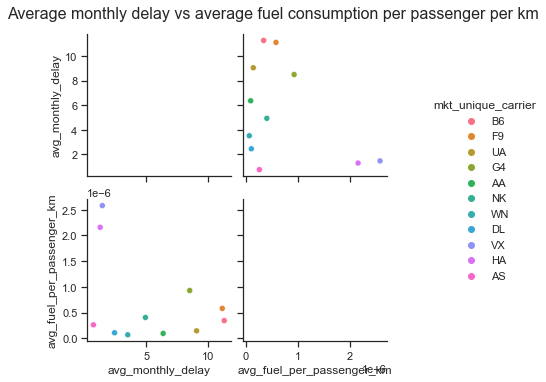

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")

# Set the style for the plot
sns.set(style="ticks")

# pairplot
sns.pairplot(sorted_data, hue='mkt_unique_carrier', vars=['avg_monthly_delay', 'avg_fuel_per_passenger_km'])

# give a title to the plot, make it at the top of the plot
plt.suptitle('Average monthly delay vs average fuel consumption per passenger per km', fontsize=16, y=1.05)

# save as png
plt.savefig(IMAGES_GENERATED_PATH + 'EDA_10_pairplot.png', dpi=300, bbox_inches='tight', pad_inches=0.1, facecolor='w', edgecolor='w')


# Show the plot
plt.show()


## Appendix

### Prepare data for OpenWeatherMap API

In [27]:
# flights_df['fl_date min and max value'] 's min and max value
print("flights_df['fl_date'] min and max value:")
print(flights_df['fl_date'].min())
print(flights_df['fl_date'].max())

flights_df['fl_date'] min and max value:
2018-01-01
2019-12-31


In [29]:
# create a df called minmaxdate = 
# convert flights_df['fl_date min and max value'] to date type from string like 2018-01-01, and
# convert calculate the min and max of the minmaxdate

minmaxdate = pd.to_datetime(flights_df['fl_date'])
minmaxdate.min()
minmaxdate.max()



Timestamp('2018-01-01 00:00:00')

Timestamp('2019-12-31 00:00:00')

In [30]:
airport_info.columns

Index(['airport_code', 'airport_name', 'airport_lat', 'airport_long'], dtype='object')

In [31]:
airport_info.head()


,airport_code,airport_name,airport_lat,airport_long
0,SLC,"Salt Lake City, UT",40.789940,-111.979071
1,DTW,"Detroit, MI",42.216249,-83.355364
2,ATL,"Atlanta, GA",33.640728,-84.427700
3,CLT,"Charlotte, NC",35.214403,-80.947315
4,MSP,"Minneapolis, MN",44.884755,-93.222285


In [36]:
# save the airport_info to csv file

# based on the following instructions:
# The only format that is currently accepted for importing is CSV.
# Make sure your CSV file is using the semi-colon delimiter, not a comma.
# Your CSV file needs to be encoded as UTF-8 or Unicode.
# The file should contain columns in the following order: location (string), latitude (float), longitude (float).
# Coordinates will be rounded to the 6th decimal place.
# Please refer to the example below. Download sample file

# save the airport_info to csv file, only the 3 columns: 'airport_code', 'airport_lat', 'airport_long'

# avoid the last empty line
airport_info.to_csv(IMAGES_GENERATED_PATH + 'airport_info.csv', index=False, header=False, columns=['airport_code', 'airport_lat', 'airport_long'], sep=';')

In [35]:
airport_info.shape


(376, 4)